## 랜덤포레스트 방어율 모델

In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

In [131]:
# 랜덤포레스트 자책점 모델
R_ONE =pd.read_csv(r'C:\Users\yuntaeyang\Desktop\svt_code\LOST_END.csv' , encoding = 'ms949' , index_col=0)
R_ONE1 = R_ONE.iloc[0:4642, :]
R_END = R_ONE.iloc[4642:4900, :] # 실제 예측해야하는 데이터
ER_1 = R_ONE1.iloc[0:2680, :]
ER_2 = R_ONE1.iloc[2680:2940, :]# test셋
ER_3 = R_ONE1.iloc[2940:4642, :]
df = [ER_1, ER_3]
ER_ONE= pd.concat(df)
ER_ONE1 = ER_ONE.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)


In [132]:
#GRIDSEARCH를 이용한 최적화
X_1 = ER_ONE1.iloc[:, :-1]
y_1 = ER_ONE1.iloc[:, -1]
X_train_1, X_test_1, y_train_1, y_test_1=train_test_split(X_1, y_1,
                                                  test_size=0.2, random_state=0)


params = {
    'n_estimators':(100, 200),
    'max_depth' : (5, 8),
    'min_samples_leaf' : (8, 16),
    'min_samples_split' : (8, 16)
}
rf_er = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_er, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train_1, y_train_1)


print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 5, 'min_samples_leaf': 16, 'min_samples_split': 8, 'n_estimators': 200}
최적 예측 정확도: 0.0000


In [133]:
# 랜덤포레스트 자책점모델 학습
rf_er = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=16, min_samples_split=8,n_estimators=200)
rf_er.fit(X_train_1, y_train_1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=16,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [134]:
# train rmse
rf_er_predict = rf_er.predict(X_train_1)
print("RMSE':{}".format(math.sqrt(mean_squared_error(rf_er_predict, y_train_1))) )

RMSE':3.1288877393011294


In [135]:
# varidation rmse
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores=cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('####',model.__class__.__name__,'####')
    print('5 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))
get_model_cv_prediction(rf_er, X_test_1, y_test_1) 

#### RandomForestRegressor ####
5 교차 검증의 평균 RMSE: 3.169


In [136]:
# test rmse
ER_T= ER_2.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)
a_1 = ER_T.iloc[:, :-1]
b_1 = ER_T.iloc[:, -1]
rf_er_predict = rf_er.predict(a_1)
print("RMSE':{}".format(math.sqrt(mean_squared_error(rf_er_predict, b_1))) )

RMSE':3.038053601885242


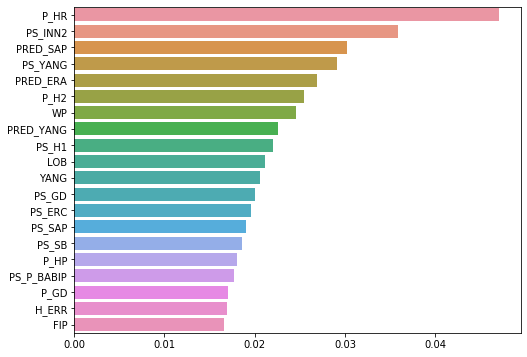

In [137]:
import matplotlib.pyplot as plt # 자책점모델 변수 중요도
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_er.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train_1.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [138]:
# 랜덤포레스트 이닝수 모델
INN_1 = R_ONE1.iloc[0:2680, :]
INN_2 = R_ONE1.iloc[2680:2940, :]# test셋
INN_3 = R_ONE1.iloc[2940:4642, :] 
df = [INN_1, INN_3]
INN_ONE= pd.concat(df) 
INN_ONE1 = INN_ONE.drop(['R_TARGET','G_ID','T_ID', 'VS_T_ID', 'TB_SC', 'ER_TARGET','GDAY_DS'], axis =1)

In [139]:
#GRIDSEARCH를 이용한 최적화
X_2 = INN_ONE1.iloc[:, :-1]
y_2 = INN_ONE1.iloc[:, -1]
X_train_2, X_test_2, y_train_2, y_test_2=train_test_split(X_2, y_2,
                                                  test_size=0.2, random_state=0)


params = {
    'n_estimators':(100, 200),
    'max_depth' : (5,8),
    'min_samples_leaf' : (8, 18),
    'min_samples_split' : (8,18)
}
rf_inn = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_inn, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train_2, y_train_2)


print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 18, 'n_estimators': 200}
최적 예측 정확도: -0.0168


In [140]:
# 랜덤포레스트 이닝수모델 학습

rf_inn = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=8, min_samples_split=18,n_estimators=200)
rf_inn.fit(X_train_2, y_train_2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=18, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [141]:
# train rmse
rf_inn_predict = rf_inn.predict(X_train_2)
print("RMSE':{}".format(math.sqrt(mean_squared_error(rf_inn_predict, y_train_2))) )

RMSE':2.0655705974424974


In [142]:
# validation rmse
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores=cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('####',model.__class__.__name__,'####')
    print('5 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))
get_model_cv_prediction(rf_inn, X_test_2, y_test_2)

#### RandomForestRegressor ####
5 교차 검증의 평균 RMSE: 2.050


In [143]:
# test rmse
INN_T= INN_2.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'ER_TARGET','GDAY_DS'], axis =1)
a_2 = INN_T.iloc[:, :-1]
b_2 = INN_T.iloc[:, -1]
rf_inn_predict = rf_inn.predict(a_1)
print("RMSE':{}".format(math.sqrt(mean_squared_error(rf_inn_predict, b_2))) )

RMSE':2.064315062045951


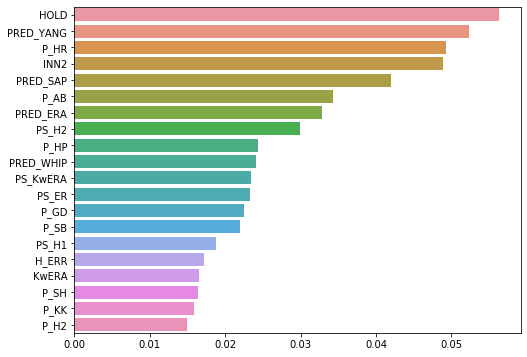

In [144]:
import matplotlib.pyplot as plt #이닝수모델 변수 중요도
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_inn.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train_2.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

## XGBOOST 방어율 모델

In [145]:
import xgboost as xgb
from xgboost import plot_importance
import warnings
warnings.filterwarnings('ignore')

In [146]:
# XGBOOST 자책점모델 베이지안 최적화
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import xgboost as xgb

X_1 = ER_ONE1.iloc[:, :-1]
y_1 = ER_ONE1.iloc[:, -1]
X_train_1, X_test_1, y_train_1, y_test_1=train_test_split(X_1, y_1,
                                                  test_size=0.2, random_state=0)
                                                 
dtrain = xgb.DMatrix(data=X_train_1, label=y_train_1)
dtest = xgb.DMatrix(data=X_test_1, label=y_test_1)


def xgb_evaluate(max_depth, gamma, colsample_bytree,min_child_weight,eta,subsample):
    params = {'eval_metric': 'rmse',
              'objective':'reg:squarederror',
              'min_child_weight': min_child_weight,
              'max_depth': int(max_depth),
              'subsample': subsample,
              'eta': eta,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=3)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9),
                                            'min_child_weight': (5, 9),
                                            'eta':(0.1, 0.3),
                                            'subsample':(0.7,1.0)},random_state = 0 )
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=3, n_iter=5, acq='ei')

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -3.682    |  0.6293   |  0.243    |  0.6028   |  5.18     |  6.695    |  0.8938   |
|  2        | -3.658    |  0.5626   |  0.2784   |  0.9637   |  4.534    |  8.167    |  0.8587   |
|  3        | -3.519    |  0.6408   |  0.2851   |  0.07104  |  3.349    |  5.081    |  0.9498   |
|  4        | -3.339    |  0.3      |  0.1      |  1.0      |  3.0      |  5.0      |  0.7      |
|  5        | -3.5      |  0.845    |  0.2523   |  0.9849   |  3.153    |  5.016    |  0.8589   |
|  6        | -3.606    |  0.3      |  0.1      |  1.0      |  7.0      |  5.0      |  0.7      |
|  7        | -3.335    |  0.3      |  0.1      |  0.0      |  3.0      |  7.544    |  0.7      |
|  8        | -3.337    |  0.3      |  0.1      |  1.0      |  3.0      |  6.652    |  0.7      |


[0]	train-rmse:5.05586	eval-rmse:4.84954
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:4.76682	eval-rmse:4.56683
[2]	train-rmse:4.51619	eval-rmse:4.31907
[3]	train-rmse:4.30457	eval-rmse:4.11035
[4]	train-rmse:4.12522	eval-rmse:3.93717
[5]	train-rmse:3.97054	eval-rmse:3.78919
[6]	train-rmse:3.84141	eval-rmse:3.66804
[7]	train-rmse:3.72972	eval-rmse:3.56626
[8]	train-rmse:3.63462	eval-rmse:3.48235
[9]	train-rmse:3.55791	eval-rmse:3.41835
[10]	train-rmse:3.49426	eval-rmse:3.35992
[11]	train-rmse:3.44077	eval-rmse:3.31485
[12]	train-rmse:3.39726	eval-rmse:3.27758
[13]	train-rmse:3.35905	eval-rmse:3.24651
[14]	train-rmse:3.3295	eval-rmse:3.22378
[15]	train-rmse:3.30357	eval-rmse:3.20583
[16]	train-rmse:3.27937	eval-rmse:3.18959
[17]	train-rmse:3.26014	eval-rmse:3.17642
[18]	train-rmse:3.2433	eval-rmse:3.16576
[19]	train-rmse:3.23077	eval-rmse:3.15654
[20]	train-rmse:3.21815	eval-

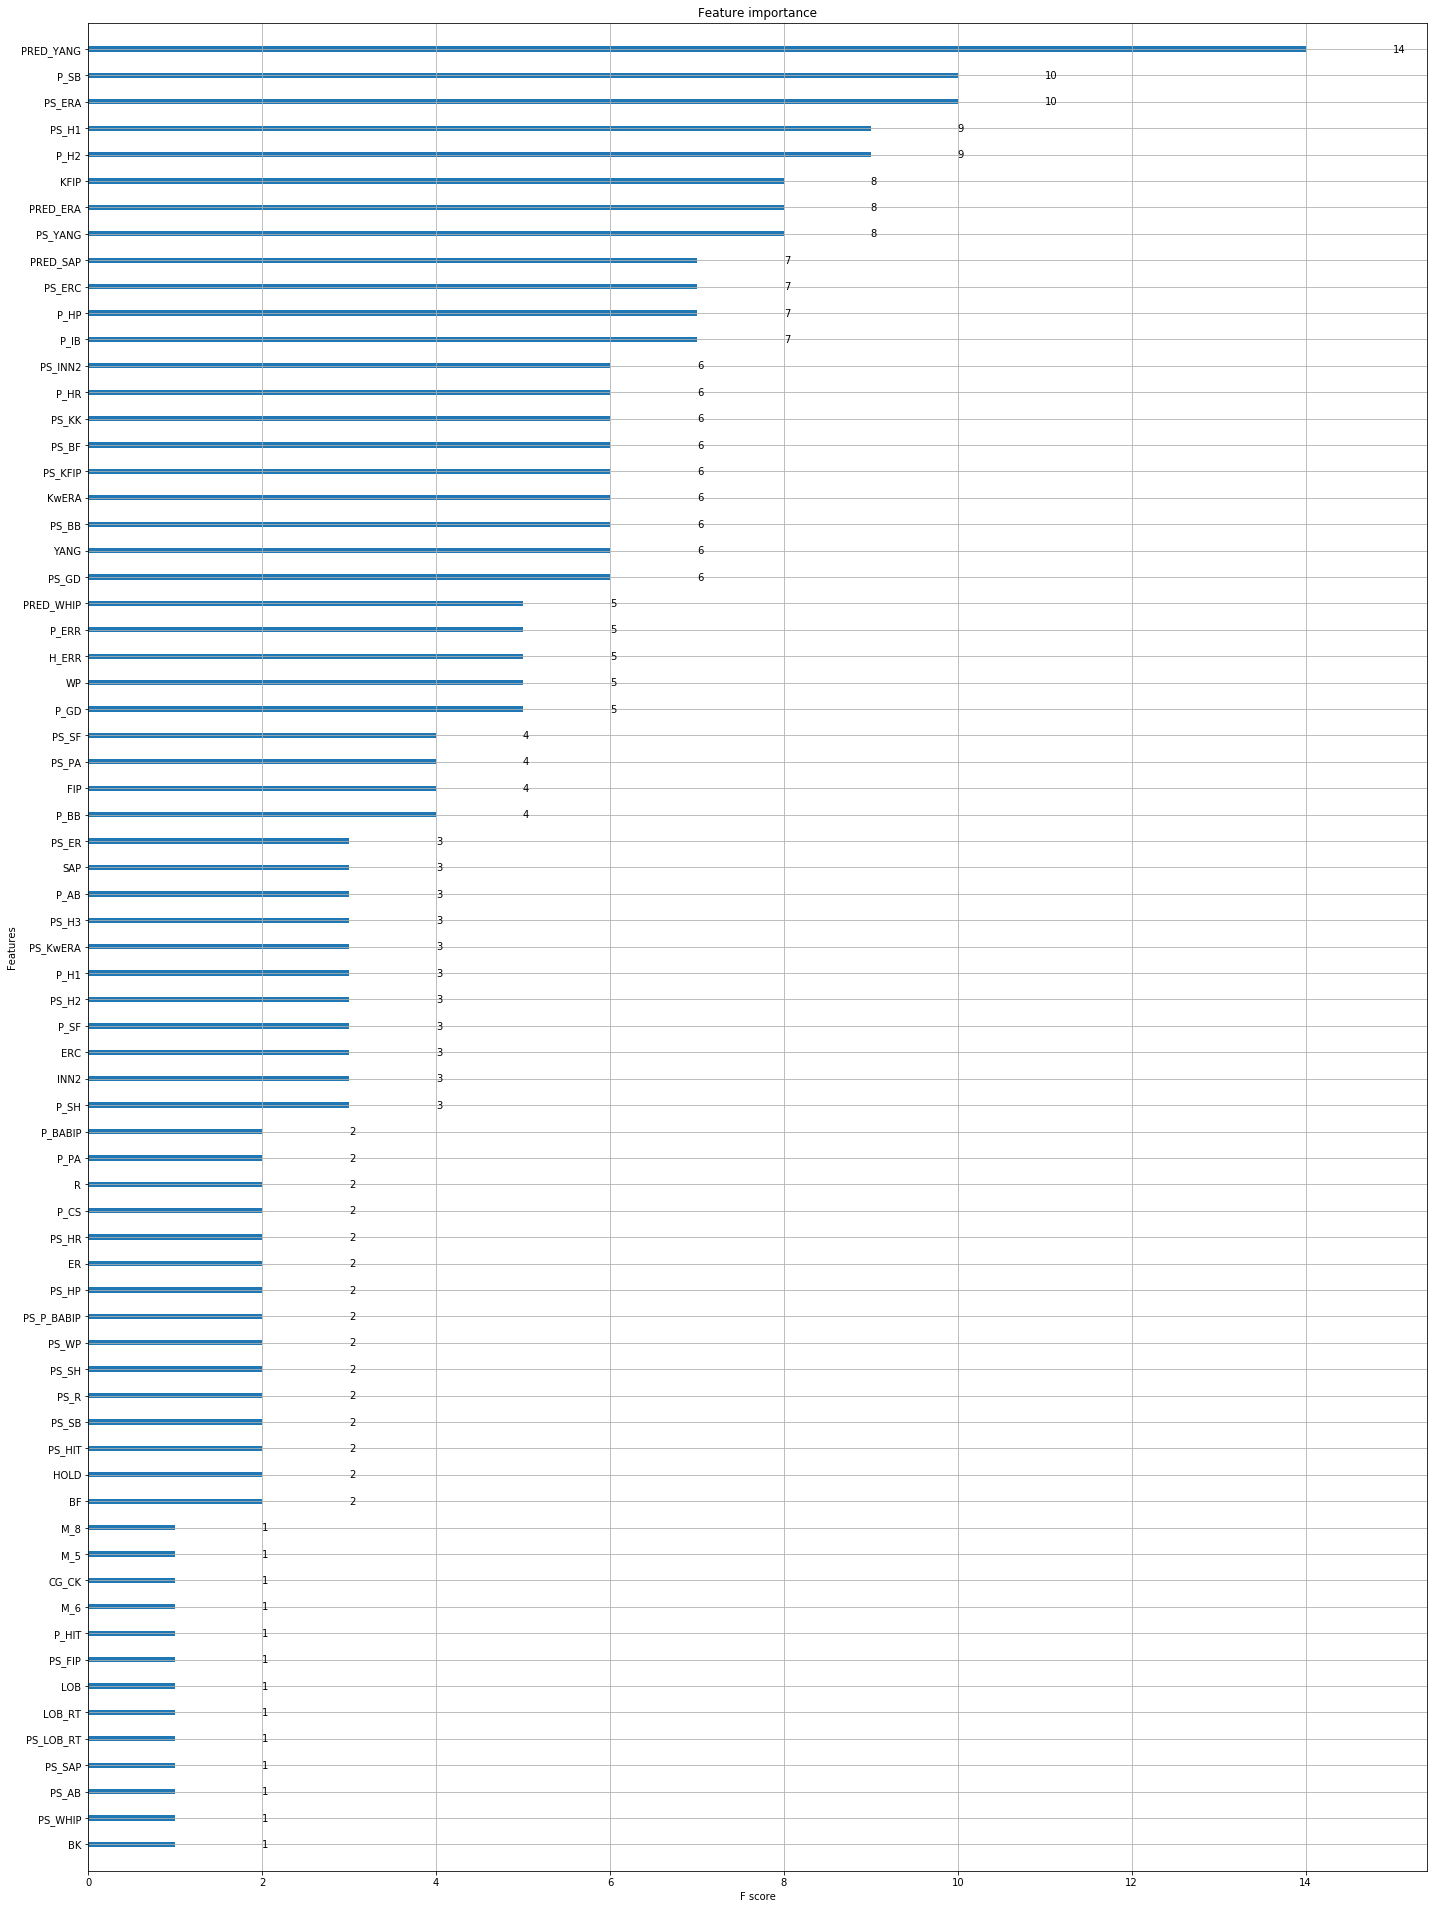

In [147]:
# XGBOOST 자책점 모델 학습
X_1 = ER_ONE1.iloc[:, :-1]
y_1 = ER_ONE1.iloc[:, -1]
X_train_1, X_test_1, y_train_1, y_test_1=train_test_split(X_1, y_1,
                                                  test_size=0.2, random_state=0)
                                                 
dtrain = xgb.DMatrix(data=X_train_1, label=y_train_1)
dtest = xgb.DMatrix(data=X_test_1, label=y_test_1)

params = {
         'max_depth': 3,
         'eta': 0.1,
         'objective':'reg:squarederror',
         'eval_metric': 'rmse',
         'early_stopings':10,
         'gamma': 0,
         'colsample_bytree':0.3,
         'min_child_weight': 7.544,
         'subsample': 0.7
         }
num_rounds = 500

wlist = [(dtrain, 'train'),(dtest, 'eval')]
xgb_er=xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=10, evals=wlist)

pred = xgb_er.predict(dtest)



from xgboost import plot_importance # 자책점모델의 변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(24, 34))
plot_importance(xgb_er, ax=ax)

In [148]:
# test rmse
ER_T= ER_2.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)
a_1 = ER_T.iloc[:, :-1]
b_1 = ER_T.iloc[:, -1]
atest = xgb.DMatrix(data=a_1)
xgb_er_predict = xgb_er.predict(atest)
print("RMSE':{}".format(math.sqrt(mean_squared_error(xgb_er_predict, b_1))) )

RMSE':3.063345815278863


In [149]:
# XGBOOST 이닝수 모델 베이지안 최적화
X_2 = INN_ONE1.iloc[:, :-1]
y_2 = INN_ONE1.iloc[:, -1]
X_train_2, X_test_2, y_train_2, y_test_2=train_test_split(X_2, y_2,
                                                  test_size=0.2, random_state=0)
                                                 
dtrain = xgb.DMatrix(data=X_train_2, label=y_train_2)
dtest = xgb.DMatrix(data=X_test_2, label=y_test_2)


def xgb_evaluate(max_depth, gamma, colsample_bytree,min_child_weight,eta,subsample):
    params = {'eval_metric': 'rmse',
              'objective':'reg:squarederror',
              'min_child_weight': min_child_weight,
              'max_depth': int(max_depth),
              'subsample': subsample,
              'eta': eta,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=3)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9),
                                            'min_child_weight': (5, 9),
                                            'eta':(0.1, 0.3),
                                            'subsample':(0.7, 1.0)}, random_state=0)
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=3, n_iter=5, acq='ei')

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -2.505    |  0.6293   |  0.243    |  0.6028   |  5.18     |  6.695    |  0.8938   |
|  2        | -2.46     |  0.5626   |  0.2784   |  0.9637   |  4.534    |  8.167    |  0.8587   |
|  3        | -2.361    |  0.6408   |  0.2851   |  0.07104  |  3.349    |  5.081    |  0.9498   |
|  4        | -2.212    |  0.9      |  0.1      |  0.0      |  3.0      |  9.0      |  1.0      |
|  5        | -2.324    |  0.3366   |  0.2309   |  0.09991  |  3.018    |  8.891    |  0.758    |
|  6        | -2.375    |  0.9      |  0.1      |  0.0      |  7.0      |  9.0      |  1.0      |
|  7        | -2.321    |  0.8807   |  0.2048   |  0.04558  |  3.114    |  7.453    |  0.8248   |
|  8        | -2.311    |  0.883    |  0.1931   |  0.9633   |  3.067    |  8.8      |  0.7286   |


[0]	train-rmse:23.6504	eval-rmse:23.6649
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:21.3069	eval-rmse:21.3204
[2]	train-rmse:19.1999	eval-rmse:19.2123
[3]	train-rmse:17.3061	eval-rmse:17.3173
[4]	train-rmse:15.6044	eval-rmse:15.6142
[5]	train-rmse:14.0759	eval-rmse:14.0843
[6]	train-rmse:12.7036	eval-rmse:12.7103
[7]	train-rmse:11.4723	eval-rmse:11.4772
[8]	train-rmse:10.3683	eval-rmse:10.3711
[9]	train-rmse:9.37906	eval-rmse:9.3797
[10]	train-rmse:8.49359	eval-rmse:8.4913
[11]	train-rmse:7.70192	eval-rmse:7.69667
[12]	train-rmse:6.99514	eval-rmse:6.98742
[13]	train-rmse:6.36506	eval-rmse:6.35426
[14]	train-rmse:5.80439	eval-rmse:5.79277
[15]	train-rmse:5.30669	eval-rmse:5.29507
[16]	train-rmse:4.8663	eval-rmse:4.85151
[17]	train-rmse:4.47699	eval-rmse:4.46131
[18]	train-rmse:4.13382	eval-rmse:4.11647
[19]	train-rmse:3.83338	eval-rmse:3.81502
[20]	train-rmse:3.57182	eval-r

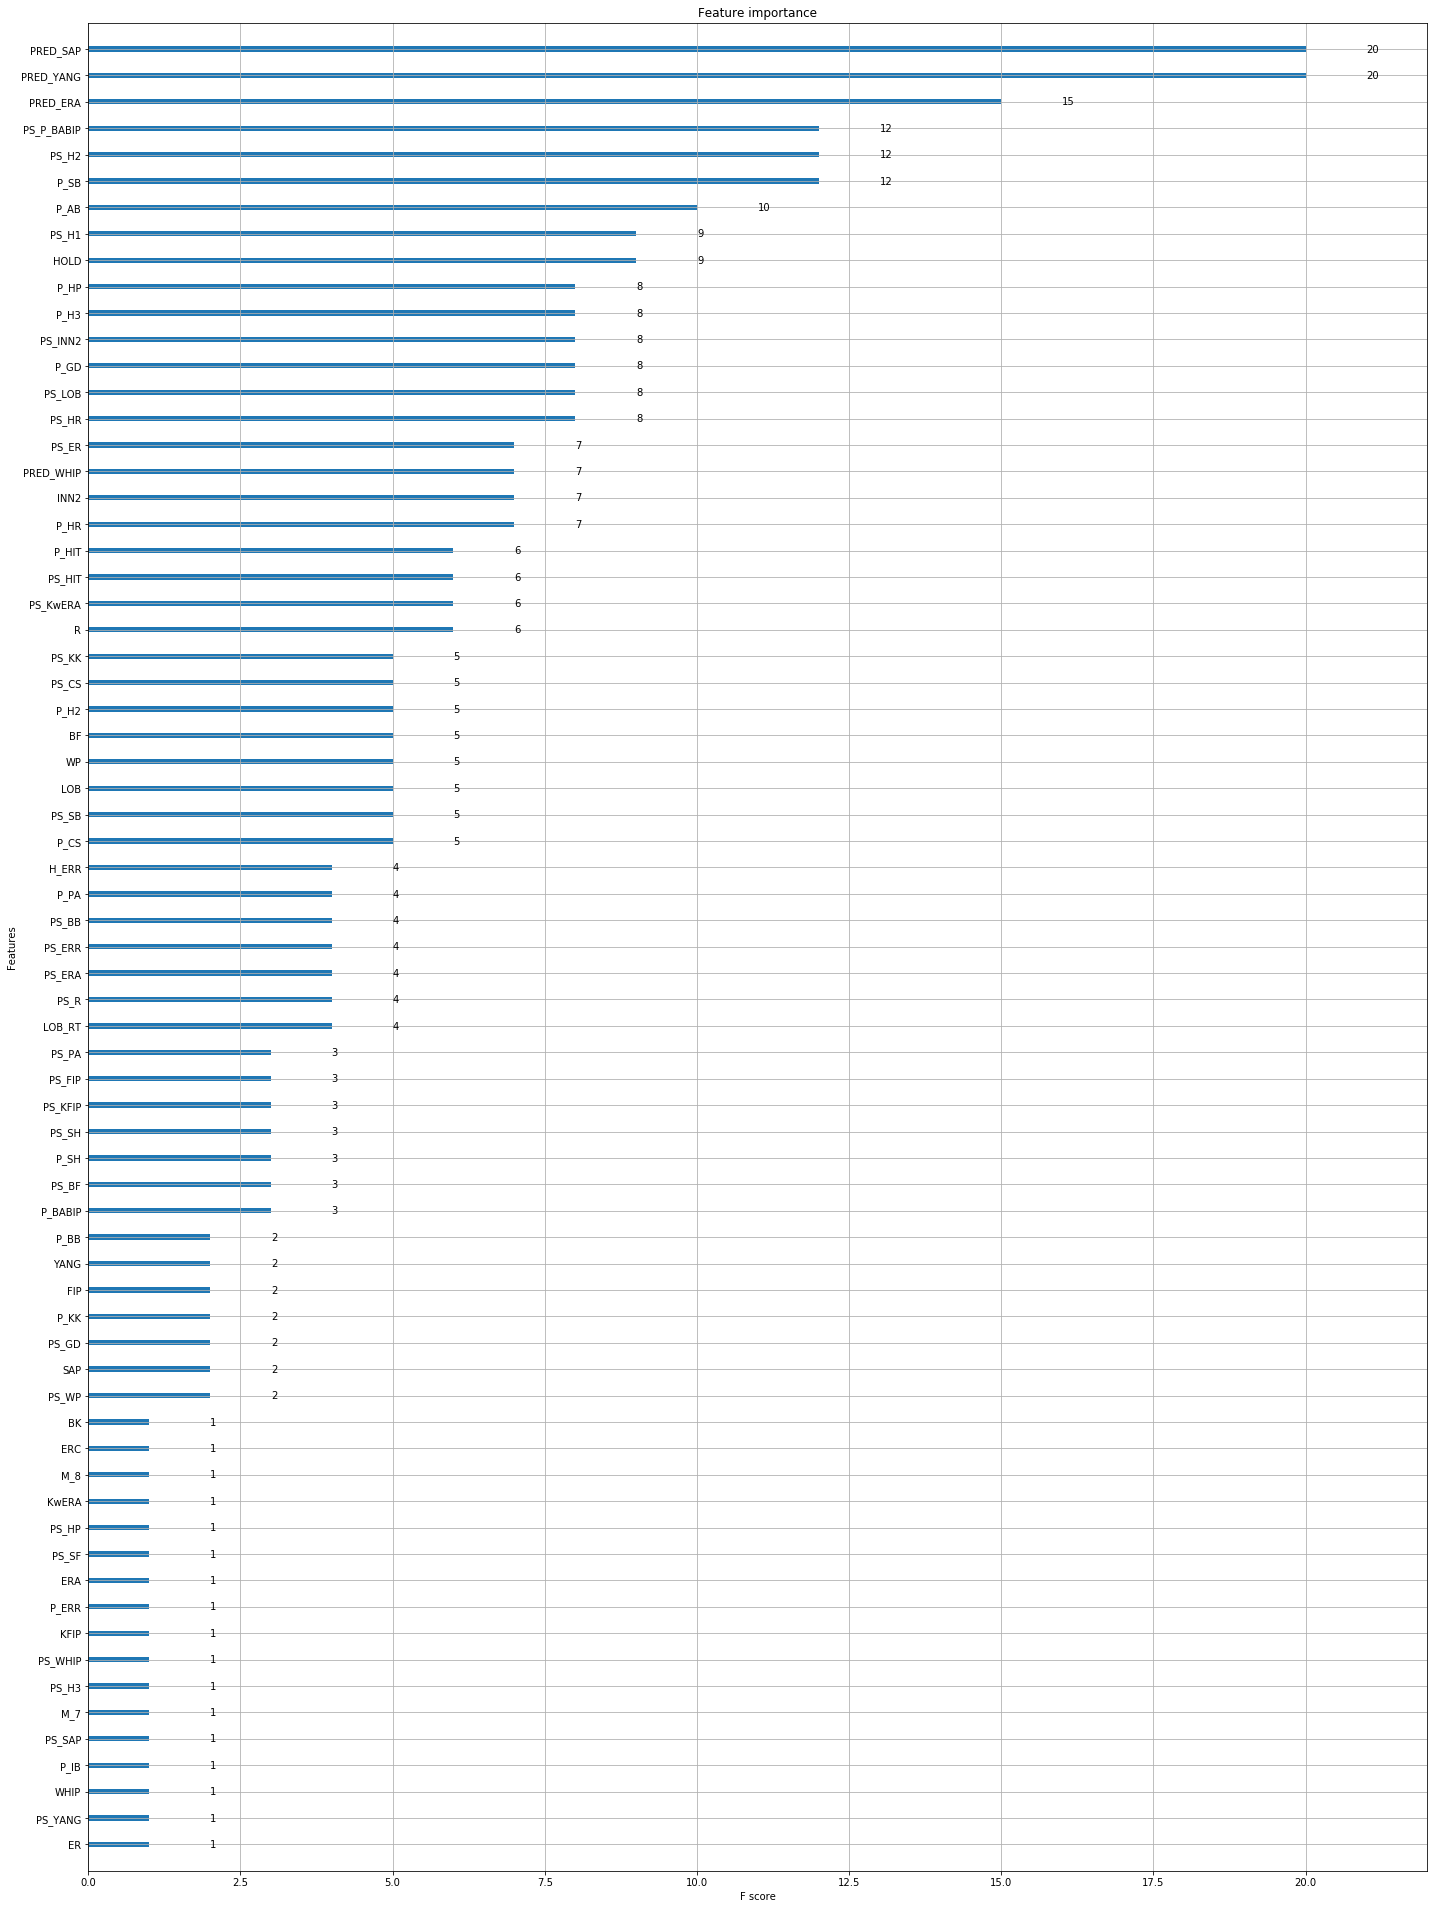

In [150]:
# XGBOOST 이닝수 모델 학습
X_2 = INN_ONE1.iloc[:, :-1]
y_2 = INN_ONE1.iloc[:, -1]
X_train_2, X_test_2, y_train_2, y_test_2=train_test_split(X_2, y_2,
                                                  test_size=0.2, random_state=0)
                                                 
dtrain = xgb.DMatrix(data=X_train_2, label=y_train_2)
dtest = xgb.DMatrix(data=X_test_2, label=y_test_2)

params = {'max_depth': 3,
         'eta': 0.1,
         'objective':'reg:squarederror',
         'eval_metric': 'rmse',
         'early_stopings':10,
         'gamma': 0,
         'colsample_bytree':0.9,
         'min_child_weight':9,
         'subsample': 1.0
         }
num_rounds = 500

wlist = [(dtrain, 'train'),(dtest, 'eval')]
xgb_inn =xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=10, evals=wlist)

pred = xgb_inn.predict(dtest)



from xgboost import plot_importance # 타수 모델 변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(24, 34))
plot_importance(xgb_inn, ax=ax)

In [151]:
# test rmse
INN_T= INN_2.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'ER_TARGET','GDAY_DS'], axis =1)
a_2 = INN_T.iloc[:, :-1]
b_2 = INN_T.iloc[:, -1]
a1test = xgb.DMatrix(data=a_2)
xgb_INN_predict = xgb_inn.predict(a1test)
print("RMSE':{}".format(math.sqrt(mean_squared_error(xgb_INN_predict, b_2))) )

RMSE':2.0777022719974125


## LIGHTGBM 방어율 모델

In [152]:
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

In [153]:
# LIGHTGBM 자책점 모델 베이지안 최적화
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves,learning_rate,min_child_weight):
    X_1 = ER_ONE1.iloc[:, :-1]
    y_1 = ER_ONE1.iloc[:, -1]
    X_train_1, X_test_1, y_train_1, y_test_1=train_test_split(X_1, y_1,
                                                  test_size=0.2, random_state=0)
    model = LGBMRegressor(learning_rate=learning_rate, n_estimators=10000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"),min_child_weight=min_child_weight)

    evalSet  = [(X_test_1, y_test_1)]
    model.fit(X_train_1, y_train_1, eval_metric="rmse", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['rmse']

    return -bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.5,1.0), 'subsample': (0.8,1.0), 'maxDepth': (3,10), 'num_leaves': (24, 45),'learning_rate':(0.01,0.3),'min_child_weight':(5,9)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5) 

|   iter    |  target   | colsam... | learni... | maxDepth  | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -3.137    |  0.7085   |  0.2189   |  3.001    |  6.209    |  27.08    |  0.8185   |
|  2        | -3.129    |  0.5931   |  0.1102   |  5.777    |  7.155    |  32.8     |  0.937    |
|  3        | -3.141    |  0.6022   |  0.2647   |  3.192    |  7.682    |  32.76    |  0.9117   |
|  4        | -3.134    |  0.5702   |  0.06745  |  8.605    |  8.873    |  30.58    |  0.9385   |
|  5        | -3.138    |  0.9382   |  0.2694   |  3.595    |  5.156    |  27.57    |  0.9756   |
|  6        | -3.151    |  0.7915   |  0.2058   |  9.692    |  5.734    |  44.99    |  0.8884   |
|  7        | -3.138    |  0.6817   |  0.1134   |  9.982    |  5.025    |  24.25    |  0.9584   |
|  8        | -3.138    |  0.511    |  0.01078  |  9.887    |  5.03     |  37.3     |  0.9438   |
|  9        | -3.136

[1]	valid_0's rmse: 3.13816	valid_0's l2: 9.84802
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 3.14001	valid_0's l2: 9.85963
[3]	valid_0's rmse: 3.13968	valid_0's l2: 9.85757
[4]	valid_0's rmse: 3.14231	valid_0's l2: 9.87414
[5]	valid_0's rmse: 3.14377	valid_0's l2: 9.88327
[6]	valid_0's rmse: 3.14675	valid_0's l2: 9.90205
[7]	valid_0's rmse: 3.14866	valid_0's l2: 9.91404
[8]	valid_0's rmse: 3.15107	valid_0's l2: 9.92925
[9]	valid_0's rmse: 3.14777	valid_0's l2: 9.90846
[10]	valid_0's rmse: 3.1513	valid_0's l2: 9.93072
[11]	valid_0's rmse: 3.15249	valid_0's l2: 9.9382
[12]	valid_0's rmse: 3.15643	valid_0's l2: 9.96305
[13]	valid_0's rmse: 3.15754	valid_0's l2: 9.97005
[14]	valid_0's rmse: 3.15389	valid_0's l2: 9.947
[15]	valid_0's rmse: 3.15651	valid_0's l2: 9.96358
[16]	valid_0's rmse: 3.16094	valid_0's l2: 9.99152
[17]	valid_0's rmse: 3.16381	valid_0's l2: 10.0097
[18]	valid_0's rmse: 3.16773	valid_0's l2: 10.0345
[19]	valid_0's rmse: 3.1724	valid

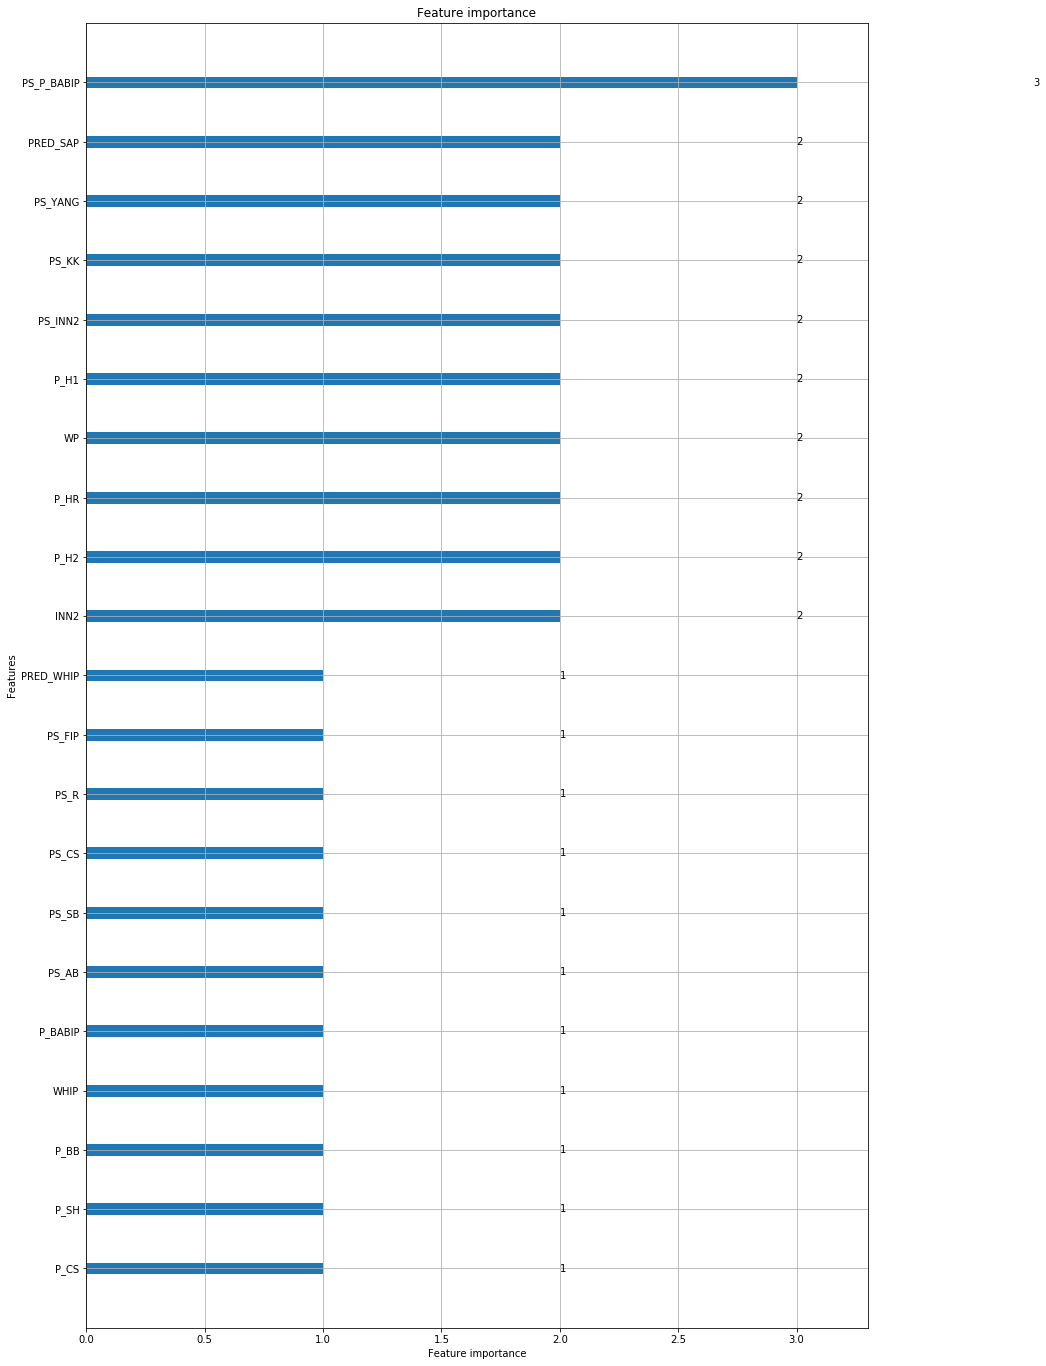

In [154]:
# LIGHTGBM 자책점 모델 학습
X_1 = ER_ONE1.iloc[:, :-1]
y_1 = ER_ONE1.iloc[:, -1]
X_train_1, X_test_1, y_train_1, y_test_1=train_test_split(X_1, y_1,
                                                  test_size=0.2, random_state=0)
                        
lgbm_er = LGBMRegressor(n_estimators=300, learning_rate=0.1102, num_leaves=33, sumbsample=0.937, colsample_bytree=0.5931, max_depth=10,
                             min_child_weight=7.155)
evals = [(X_test_1, y_test_1)]
lgbm_er.fit(X_train_1, y_train_1, early_stopping_rounds=100, eval_metric='rmse', eval_set=evals, verbose=True)
preds = lgbm_er.predict(X_test_1)

from lightgbm import plot_importance # 안타수모델의 변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 24))
plot_importance(lgbm_er, ax=ax)

In [155]:
# train rmse
lgbm_er_predict = lgbm_er.predict(X_train_1)
print("RMSE':{}".format(math.sqrt(mean_squared_error(lgbm_er_predict, y_train_1))) )

RMSE':3.2518941158038657


In [156]:
# test rmse
ER_T= ER_2.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)
a_1 = ER_T.iloc[:, :-1]
b_1 = ER_T.iloc[:, -1]
lgbm_er_predict = lgbm_er.predict(a_1)
print("RMSE':{}".format(math.sqrt(mean_squared_error(lgbm_er_predict, b_1))) )

RMSE':3.059503525692016


In [157]:
# LIGHTGBM 이닝수 모델 베이지안 최적화 
def modelFitter(colsampleByTree, subsample,maxDepth, num_leaves,learning_rate,min_child_weight):
    X_2 = INN_ONE1.iloc[:, :-1]
    y_2 = INN_ONE1.iloc[:, -1]
    X_train_2, X_test_2, y_train_2, y_test_2=train_test_split(X_2, y_2,
                                                  test_size=0.2, random_state=0)
    model = LGBMRegressor(learning_rate=learning_rate, n_estimators=10000, max_depth=maxDepth.astype("int32"), subsample=subsample, colsample_bytree=colsampleByTree,num_leaves=num_leaves.astype("int32"),min_child_weight=min_child_weight)

    evalSet  = [(X_test_2, y_test_2)]
    model.fit(X_train_2, y_train_2, eval_metric="rmse", eval_set=evalSet, early_stopping_rounds=50, verbose=False)

    bestScore = model.best_score_[list(model.best_score_.keys())[0]]['rmse']

    return -bestScore

# Bounded region of parameter space
pbounds = {'colsampleByTree': (0.5,1.0), 'subsample': (0.8,1.0), 'maxDepth': (3,10), 'num_leaves': (24, 45),'learning_rate':(0.01,0.3),'min_child_weight':(5,9)}

optimizer = BayesianOptimization(
    f=modelFitter,
    pbounds=pbounds,
    random_state=1)

optimizer.maximize(init_points=5,n_iter=5)

|   iter    |  target   | colsam... | learni... | maxDepth  | min_ch... | num_le... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -2.063    |  0.7085   |  0.2189   |  3.001    |  6.209    |  27.08    |  0.8185   |
|  2        | -2.06     |  0.5931   |  0.1102   |  5.777    |  7.155    |  32.8     |  0.937    |
|  3        | -2.062    |  0.6022   |  0.2647   |  3.192    |  7.682    |  32.76    |  0.9117   |
|  4        | -2.061    |  0.5702   |  0.06745  |  8.605    |  8.873    |  30.58    |  0.9385   |
|  5        | -2.063    |  0.9382   |  0.2694   |  3.595    |  5.156    |  27.57    |  0.9756   |
|  6        | -2.063    |  0.7915   |  0.2058   |  9.692    |  5.734    |  44.99    |  0.8884   |
|  7        | -2.06     |  0.6826   |  0.0725   |  9.997    |  8.994    |  44.82    |  0.8341   |
|  8        | -2.065    |  0.9211   |  0.1398   |  9.872    |  8.754    |  44.74    |  0.9058   |
|  9        | -2.062

[1]	valid_0's rmse: 2.06103	valid_0's l2: 4.24784
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 2.06258	valid_0's l2: 4.25423
[3]	valid_0's rmse: 2.06361	valid_0's l2: 4.25848
[4]	valid_0's rmse: 2.06378	valid_0's l2: 4.25917
[5]	valid_0's rmse: 2.06248	valid_0's l2: 4.25384
[6]	valid_0's rmse: 2.06304	valid_0's l2: 4.25611
[7]	valid_0's rmse: 2.06415	valid_0's l2: 4.26073
[8]	valid_0's rmse: 2.06615	valid_0's l2: 4.26896
[9]	valid_0's rmse: 2.06771	valid_0's l2: 4.27542
[10]	valid_0's rmse: 2.06798	valid_0's l2: 4.27655
[11]	valid_0's rmse: 2.0704	valid_0's l2: 4.28654
[12]	valid_0's rmse: 2.0721	valid_0's l2: 4.29361
[13]	valid_0's rmse: 2.07568	valid_0's l2: 4.30844
[14]	valid_0's rmse: 2.07806	valid_0's l2: 4.31833
[15]	valid_0's rmse: 2.07764	valid_0's l2: 4.3166
[16]	valid_0's rmse: 2.08165	valid_0's l2: 4.33328
[17]	valid_0's rmse: 2.08169	valid_0's l2: 4.33344
[18]	valid_0's rmse: 2.08177	valid_0's l2: 4.33377
[19]	valid_0's rmse: 2.0828	vali

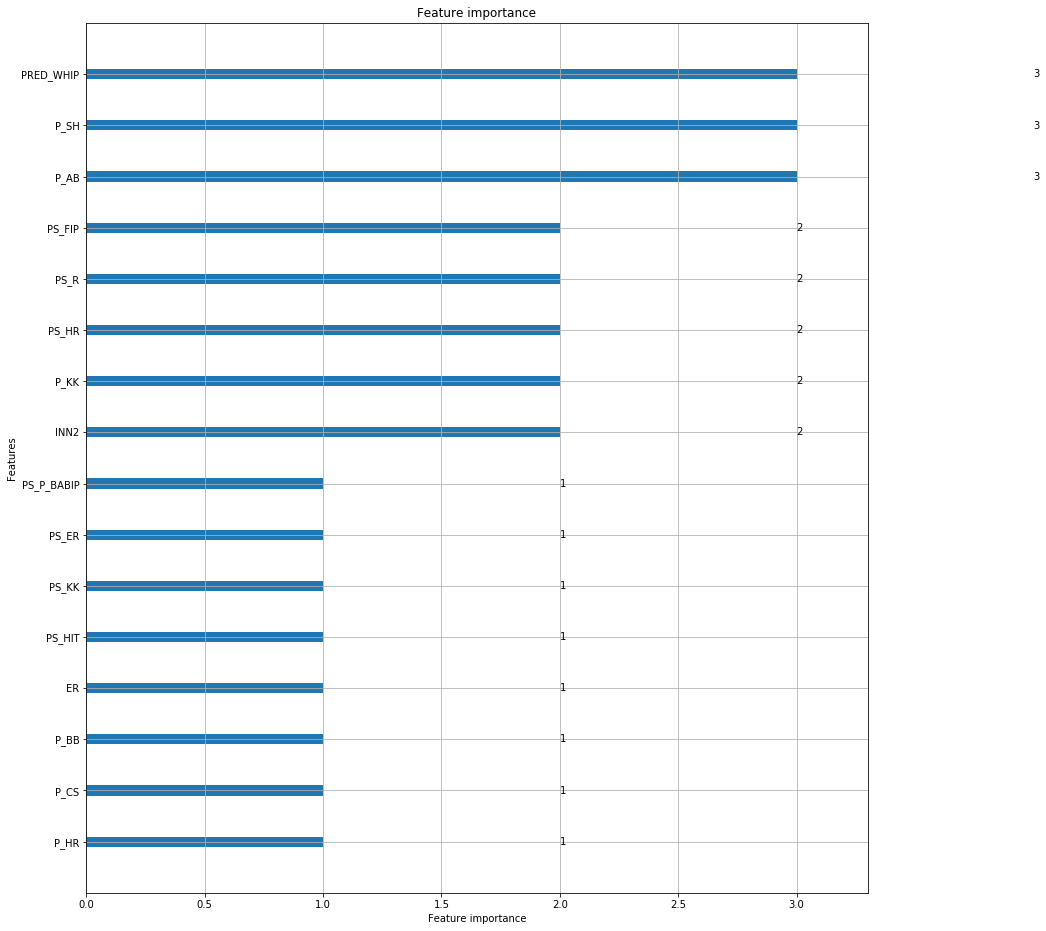

In [158]:
# LIGHTGBM 이닝수 모델 학습
X_2 = INN_ONE1.iloc[:, :-1]
y_2 = INN_ONE1.iloc[:, -1]
X_train_2, X_test_2, y_train_2, y_test_2=train_test_split(X_2, y_2,
                                                  test_size=0.2, random_state=0)
                        
lgbm_inn = LGBMRegressor(n_estimators=300, learning_rate=0.1102, num_leaves=33, sumbsample=0.937, colsample_bytree=0.5931, max_depth=6,
                             min_child_weight=7.155)
evals = [(X_test_2, y_test_2)]
lgbm_inn.fit(X_train_2, y_train_2, early_stopping_rounds=100, eval_metric='rmse', eval_set=evals, verbose=True)
preds = lgbm_inn.predict(X_test_2)

from lightgbm import plot_importance # 타수 모델 변수 중요도
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14, 16))
plot_importance(lgbm_inn, ax=ax)

In [159]:
# train rmse
lgbm_inn_predict = lgbm_inn.predict(X_train_2)
print("RMSE':{}".format(math.sqrt(mean_squared_error(lgbm_inn_predict, y_train_2))) )

RMSE':2.1431928086718384


In [160]:
# test rmse
INN_T= INN_2.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'ER_TARGET','GDAY_DS'], axis =1)
a_2 = INN_T.iloc[:, :-1]
b_2 = INN_T.iloc[:, -1]
lgbm_inn_predict = lgbm_inn.predict(a_2)
print("RMSE':{}".format(math.sqrt(mean_squared_error(lgbm_inn_predict, b_2))) ) 

RMSE':2.051433288519747


## MLP 방어율 모델

In [161]:
# mlp 자책점 모델
X_1 = ER_ONE1.iloc[:,:-1]
y_1 = ER_ONE1.iloc[:,-1]

In [162]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_1)
ER_ONE_scaled = scaler.transform(X_1)

ER_scaled = pd.DataFrame(data=ER_ONE_scaled)

In [163]:
# mlp 모델 생성
from keras import models
from keras import layers

mlp_er = models.Sequential()
mlp_er.add(layers.Dense(85, activation='relu',
                          input_shape=(ER_scaled.shape[1],)))
mlp_er.add(layers.Dropout(0.5))
mlp_er.add(layers.BatchNormalization())
mlp_er.add(layers.Dense(60, activation='relu'))
mlp_er.add(layers.Dropout(0.5))
mlp_er.add(layers.BatchNormalization())
mlp_er.add(layers.Dense(60, activation='relu'))
mlp_er.add(layers.Dense(1))

In [164]:
# mlp 자책점 모델 학습
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.3, beta_2=0.999, epsilon=1e-07)
mlp_er.compile(optimizer=opt,
             loss='mean_squared_error', metrics=['mean_squared_error'])

In [165]:
import warnings
import pathlib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1=train_test_split(ER_scaled, y_1,
                                                 test_size=0.2, random_state=1)
        
early_stop = keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', patience=10)
EPOCHS=100
        
history = mlp_er.fit(X_train_1, y_train_1,
          epochs=EPOCHS,validation_data = (X_test_1, y_test_1), verbose=0, callbacks= early_stop, batch_size=20)

In [166]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
23,10.695746,10.695746,10.186813,10.186813,23
24,10.646381,10.646382,10.369040,10.369040,24
25,10.718743,10.718743,10.279225,10.279225,25
26,10.719638,10.719638,10.313697,10.313697,26
27,10.735373,10.735373,10.152710,10.152710,27


In [167]:
# train rmse
math.sqrt(10.828327)

3.2906423385108265

In [168]:
# validation mse
math.sqrt(11.268063)

3.356793559336052

In [169]:
# test RMSE
ER_T = ER_2.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)
a_1 = ER_T.iloc[:, :-1]
b_1 = ER_T.iloc[:, -1]
scaler = StandardScaler()
scaler.fit(X_1)
ER_2_scaled = scaler.transform(a_1)

ER2_scaled = pd.DataFrame(data=ER_2_scaled)
mlp_er_predict = mlp_er.predict(ER2_scaled)
print("RMSE':{}".format(math.sqrt(mean_squared_error(mlp_er_predict, b_1))) )

RMSE':3.058511980110828


In [170]:
# mlp 이닝수 모델
X_2 = INN_ONE1.iloc[:,:-1]
y_2 = INN_ONE1.iloc[:,-1]

In [171]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_2)
INN_scaled = scaler.transform(X_2)

INN2_scaled = pd.DataFrame(data=INN_scaled)

In [172]:
# mlp 이닝수 모델 생성 
from keras import models
from keras import layers

mlp_inn = models.Sequential()
mlp_inn.add(layers.Dense(85, activation='relu',
                          input_shape=(INN2_scaled.shape[1],)))
mlp_inn.add(layers.Dropout(0.5))
mlp_inn.add(layers.BatchNormalization())
mlp_inn.add(layers.Dense(60, activation='relu'))
mlp_inn.add(layers.Dropout(0.5))
mlp_inn.add(layers.BatchNormalization())
mlp_inn.add(layers.Dense(60, activation='relu'))
mlp_inn.add(layers.Dense(1))

In [173]:
# mlp 이닝수 모델 학습
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.3, beta_2=0.999, epsilon=1e-07)
mlp_inn.compile(optimizer=opt,
             loss='mean_squared_error', metrics=['mean_squared_error'])

In [174]:
import warnings
import pathlib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

X_train_2, X_test_2, y_train_2, y_test_2=train_test_split(INN2_scaled, y_2,
                                                 test_size=0.2, random_state=1)
        
early_stop = keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', patience=10)
EPOCHS=100
        
history = mlp_inn.fit(X_train_2, y_train_2,
          epochs=EPOCHS,validation_data = (X_test_2, y_test_2), verbose=0, callbacks= early_stop, batch_size=20)

In [175]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
25,4.993681,4.993681,9.025753,9.025753,25
26,5.047129,5.047129,6.852723,6.852723,26
27,5.058570,5.058570,19.005045,19.005045,27
28,5.178240,5.178240,6.604749,6.604749,28
29,5.041566,5.041566,10.174845,10.174845,29


In [176]:
# train rmse
math.sqrt(4.884743)

2.2101454703254264

In [177]:
# varidation rmse
math.sqrt(4.797317)

2.190277836257309

In [178]:
# test RMSE
INN_T = INN_2.drop(['R_TARGET','G_ID','T_ID', 'VS_T_ID', 'TB_SC', 'ER_TARGET','GDAY_DS'], axis =1)
a_2 = INN_T.iloc[:, :-1]
b_2 = INN_T.iloc[:, -1]
scaler = StandardScaler()
scaler.fit(X_2)
INN2_2_scaled = scaler.transform(a_2)

INN22_scaled = pd.DataFrame(data=INN2_2_scaled)
mlp_inn_predict = mlp_inn.predict(INN22_scaled)
print("RMSE':{}".format(math.sqrt(mean_squared_error(mlp_inn_predict, b_2))) )

RMSE':3.023064024916021


## 최종 방어율 모델 xgb으로 테스트

In [179]:
ER_NC = ER_2[ER_2['T_ID']== 'NC']
ER_OB = ER_2[ER_2['T_ID']== 'OB']
ER_LG = ER_2[ER_2['T_ID']== 'LG']
ER_WO = ER_2[ER_2['T_ID']== 'WO']
ER_HH = ER_2[ER_2['T_ID']== 'HH']
ER_HT = ER_2[ER_2['T_ID']== 'HT']
ER_KT = ER_2[ER_2['T_ID']== 'KT']
ER_LT = ER_2[ER_2['T_ID']== 'LT']
ER_SK = ER_2[ER_2['T_ID']== 'SK']
ER_SS = ER_2[ER_2['T_ID']== 'SS']
ER_HH = ER_HH.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)
ER_OB = ER_OB.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)
ER_LG = ER_LG.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)
ER_WO = ER_WO.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)
ER_NC = ER_NC.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)
ER_HT = ER_HT.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)
ER_KT = ER_KT.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)
ER_LT = ER_LT.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)
ER_SK = ER_SK.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)
ER_SS = ER_SS.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS'], axis =1)

# test셋 팀별 자책점를 보기 위한 분할

In [180]:
INN_NC = INN_2[INN_2['T_ID']== 'NC']
INN_OB = INN_2[INN_2['T_ID']== 'OB']
INN_LG = INN_2[INN_2['T_ID']== 'LG']
INN_WO = INN_2[INN_2['T_ID']== 'WO']
INN_HH = INN_2[INN_2['T_ID']== 'HH']
INN_HT = INN_2[INN_2['T_ID']== 'HT']
INN_KT = INN_2[INN_2['T_ID']== 'KT']
INN_LT = INN_2[INN_2['T_ID']== 'LT']
INN_SK = INN_2[INN_2['T_ID']== 'SK']
INN_SS = INN_2[INN_2['T_ID']== 'SS']
INN_HH = INN_HH.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'ER_TARGET','GDAY_DS'], axis =1)
INN_OB = INN_OB.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'ER_TARGET','GDAY_DS'], axis =1)
INN_LG = INN_LG.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'ER_TARGET','GDAY_DS'], axis =1)
INN_WO = INN_WO.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'ER_TARGET','GDAY_DS'], axis =1)
INN_NC = INN_NC.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'ER_TARGET','GDAY_DS'], axis =1)
INN_HT = INN_HT.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'ER_TARGET','GDAY_DS'], axis =1)
INN_KT = INN_KT.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'ER_TARGET','GDAY_DS'], axis =1)
INN_LT = INN_LT.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'ER_TARGET','GDAY_DS'], axis =1)
INN_SK = INN_SK.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'ER_TARGET','GDAY_DS'], axis =1)
INN_SS = INN_SS.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'ER_TARGET','GDAY_DS'], axis =1)

In [181]:
def xgb_era(A,B):
    a_test = A.iloc[:, :-1]
    b_test = A.iloc[:, -1]
    ktest = xgb.DMatrix(data=a_test)
    pred = xgb_er.predict(ktest)

    nam =['col1']
    y = pd.DataFrame(pred, columns=nam)
    y_sum1 = y['col1'].sum()
    y_sum1 # 예측 자책점 합
    
    a_test1 = B.iloc[:, :-1]
    b_test1 = B.iloc[:, -1]
    ktest1 = xgb.DMatrix(data=a_test1)
    preds = xgb_inn.predict(ktest1)
    nam =['col2']
    y = pd.DataFrame(preds, columns=nam)
    y_sum2 = y['col2'].sum()
    y_sum2 # 예측 이닝수의 합
    
    ER_sum1= b_test.sum()
    ER_sum1 # 실제 자책점 합
    
    INN_sum2= b_test1.sum()
    INN_sum2 # 실제 이닝수 합
    
    predict_era = (y_sum1 * 9) / (y_sum2 / 3) 
    real_era = ( 9 * ER_sum1) / ( INN_sum2 / 3 )
    

    
    
    return print('예측 방어율:', predict_era,
                 '실제 방어율:', real_era)

In [182]:
xgb_era(ER_WO, INN_WO)
xgb_era(ER_NC, INN_NC)
xgb_era(ER_OB, INN_OB)
xgb_era(ER_LG, INN_LG)
xgb_era(ER_HH, INN_HH)
xgb_era(ER_HT, INN_HT)
xgb_era(ER_KT, INN_KT)
xgb_era(ER_LT, INN_LT)
xgb_era(ER_SK, INN_SK)
xgb_era(ER_SS, INN_SS)

예측 방어율: 5.149231722006568 실제 방어율: 5.538461538461538
예측 방어율: 4.920634230827426 실제 방어율: 6.100961538461538
예측 방어율: 4.7937500329412295 실제 방어율: 5.027586206896552
예측 방어율: 4.928387783768547 실제 방어율: 5.382352941176471
예측 방어율: 4.873980003624704 실제 방어율: 5.675675675675675
예측 방어율: 5.18064304807884 실제 방어율: 5.2388059701492535
예측 방어율: 4.72899314021209 실제 방어율: 5.183701657458563
예측 방어율: 4.722299739235212 실제 방어율: 5.608208955223881
예측 방어율: 4.74247853765512 실제 방어율: 4.7114093959731544
예측 방어율: 4.536120160742812 실제 방어율: 4.976958525345622


In [183]:
# 예측 방어율과 실제 방어율 비교
A1 = [5.143800017877626,4.929051431567729,4.706717365248473,4.770338427112144,4.547838291214603,4.699836386754442,4.648428359081548,4.746255490187671,4.684750902544251,4.692421641310299]
B1 = [5.538461538461538,6.100961538461538,5.027586206896552,5.38235294117647,5.675675675675675,5.2388059701492535,5.183701657458563,5.608208955223881,4.7114093959731544,4.976958525345622]

print("RMSE':{}".format(math.sqrt(mean_squared_error(A1, B1))) )

RMSE':0.6841277778704776


## 방어율 최종예측

In [184]:
R_END_NC = R_END[R_END['T_ID']== 'NC']
R_END_OB = R_END[R_END['T_ID']== 'OB']
R_END_LG = R_END[R_END['T_ID']== 'LG']
R_END_WO = R_END[R_END['T_ID']== 'WO']
R_END_HH = R_END[R_END['T_ID']== 'HH']
R_END_HT = R_END[R_END['T_ID']== 'HT']
R_END_KT = R_END[R_END['T_ID']== 'KT']
R_END_LT = R_END[R_END['T_ID']== 'LT']
R_END_SK = R_END[R_END['T_ID']== 'SK']
R_END_SS = R_END[R_END['T_ID']== 'SS']
R_END_NC= R_END_NC.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS','ER_TARGET'], axis =1)
R_END_OB= R_END_OB.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS','ER_TARGET'], axis =1)
R_END_LG= R_END_LG.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS','ER_TARGET'], axis =1)
R_END_WO= R_END_WO.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS','ER_TARGET'], axis =1)
R_END_HH= R_END_HH.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS','ER_TARGET'], axis =1)
R_END_HT= R_END_HT.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS','ER_TARGET'], axis =1)
R_END_KT= R_END_KT.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS','ER_TARGET'], axis =1)
R_END_LT= R_END_LT.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS','ER_TARGET'], axis =1)
R_END_SK= R_END_SK.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS','ER_TARGET'], axis =1)
R_END_SS= R_END_SS.drop(['R_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'INN2_TARGET','GDAY_DS','ER_TARGET'], axis =1)

In [185]:
def xgb_era1(A):
    a_test = A
    ktest = xgb.DMatrix(data=a_test)
    pred = xgb_er.predict(ktest)

    nam =['col1']
    y = pd.DataFrame(pred, columns=nam)
    y_sum1 = y['col1'].sum()
    y_sum1 # 예측 자책점 합
    
    a_test1 = A
    ktest1 = xgb.DMatrix(data=a_test1)
    preds = xgb_inn.predict(ktest1)
    nam =['col2']
    y = pd.DataFrame(preds, columns=nam)
    y_sum2 = y['col2'].sum()
    y_sum2 # 예측 이닝수의 합
    
    predict_era = (y_sum1 * 9) / (y_sum2 / 3) 
    
    

    
    
    return print('예측 방어율:', predict_era)

In [186]:
xgb_era1(R_END_WO)
xgb_era1(R_END_NC)
xgb_era1(R_END_OB)
xgb_era1(R_END_LG)
xgb_era1(R_END_HH)
xgb_era1(R_END_HT)
xgb_era1(R_END_KT)
xgb_era1(R_END_LT)
xgb_era1(R_END_SK)
xgb_era1(R_END_SS)

예측 방어율: 5.02061622288112
예측 방어율: 4.77153932181009
예측 방어율: 4.3090282353660365
예측 방어율: 4.738375641477043
예측 방어율: 4.6596995079693
예측 방어율: 4.8873685066034005
예측 방어율: 4.513163655744325
예측 방어율: 4.5699661302774635
예측 방어율: 4.810313869634719
예측 방어율: 4.74705234143054
